In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc("font", size=18, family="serif")
import yt
import numpy as np
import matplotlib.pyplot as plt
from yt.utilities.physical_ratios import cm_per_kpc, K_per_keV
from yt.units import mp
import pyxsim
import soxs
import aplpy
import matplotlib.colors as colors
import os

/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/pyxsim/source_generators/light_cone.py:11: VisibleDeprecationWarning: Development of the CosmologySplice module has been moved to the yt_astro_analysis package. This version is deprecated and will be removed from yt in a future release. See https://github.com/yt-project/yt_astro_analysis for further information.
  from yt.analysis_modules.cosmological_observation.api import LightCone
/mnt/lustre/ast2/astadit/anaconda3/lib/python3.7/site-packages/yt/analysis_modules/cosmological_observation/api.py:28: VisibleDeprecationWarning: Development of the LightCone module has been moved to the yt_astro_analysis package. This version is deprecated and will be removed from yt in a future release. See https://githu

In [2]:
plt.rcParams['font.size']=20
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.minor.size']=5
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'

In [3]:
base     = "/home/aditiv/CGM/Pyxsim/Data/"
Msun = 2.e33

folder   = [ "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/", "HR_0821_1e-6_SFR3/"]
filename = ["DD0070/sb_0070", \
            "DD0090/sb_0090", \
            "DD0110/sb_0110", \
            "DD0130/sb_0130", \
            "DD0150/sb_0150", \
            "DD0220/sb_0220", \
            "DD0300/sb_0300", \
            "DD0400/sb_0400", \
            "DD0500/sb_0500"]

In [4]:
base1 = "/home/aditiv/CGM/Pyxsim/Spectra/"
i =0 
j=0
run = len(filename)
x = np.zeros((run,128))
y = np.zeros((run,128))
z = np.zeros((run,128, 128))
temp = np.zeros((run,128))
dens = np.zeros((run,128))
cellmT = np.zeros((run,128))
cellmD = np.zeros((run,128))

for f in folder:
    for file in filename:
        file_loc = base + folder[j] + file
        
        if(os.path.exists(file_loc)):
            outfile  = base1 + folder[j] + file.split('/')[0] + '/'
            
            ds       = yt.load(file_loc)
            print("File found!", file_loc)
            
            sp        = ds.sphere('c',(50,'kpc'))
            cr1       = sp.cut_region(" (obj['z'].in_units('kpc')<6) & (obj['z'].in_units('kpc')>-6)\
                               & (obj['radius'].in_units('kpc')<20)  " )

            sim_cr    = sp - cr1
            (dlow,  dhigh)  = (sim_cr.quantities.extrema('density')[0], sim_cr.quantities.extrema('density')[1])
            (tplow, tphigh) = (sim_cr.quantities.extrema('temperature')[0],\
                               sim_cr.quantities.extrema('temperature')[1])


            extrema = dict(density=(dlow, dhigh), temperature=(tplow,tphigh))

            profile = yt.create_profile(sim_cr, ['density','temperature'],
                                n_bins=[128, 128], fields=['cell_mass'],
                                weight_field=None, extrema=extrema)


            x[i] = profile.x
            y[i] = profile.y
            b = profile.field_data
            z[i,:,:] = b[('gas', 'cell_mass')]
            
            temp[i]    = np.loadtxt(outfile + "temp_cellm.txt",usecols=0)
            cellmT[i]  = np.loadtxt(outfile + "temp_cellm.txt",usecols=1)
            
            dens[i]    = np.loadtxt(outfile + "dens_cellm.txt",usecols=0)
            cellmD[i]  = np.loadtxt(outfile + "dens_cellm.txt",usecols=1)
            i = i +1
    j = j + 1

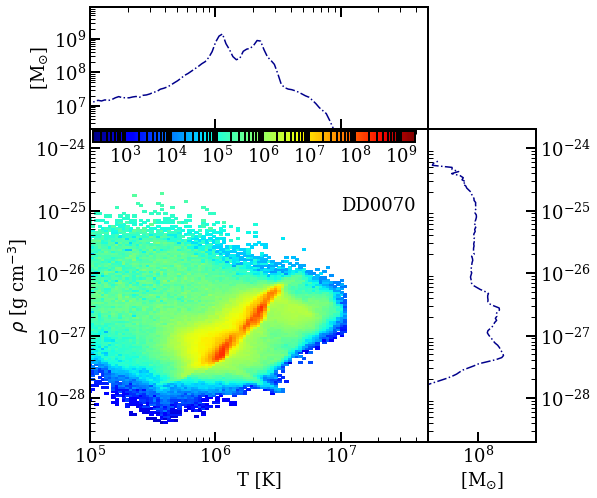

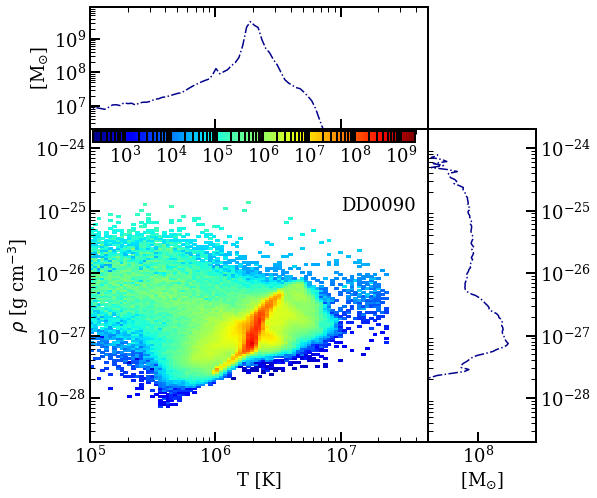

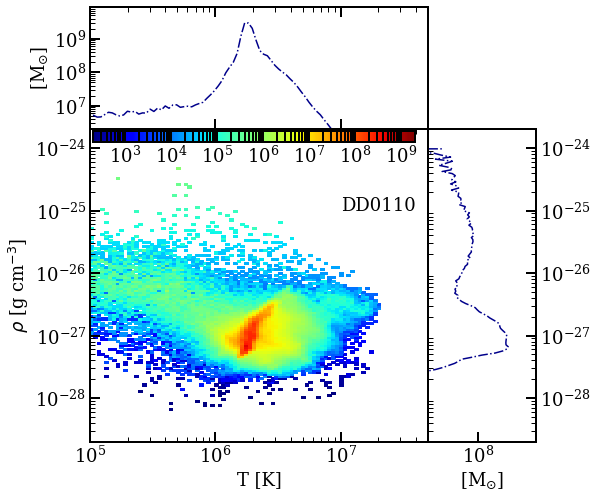

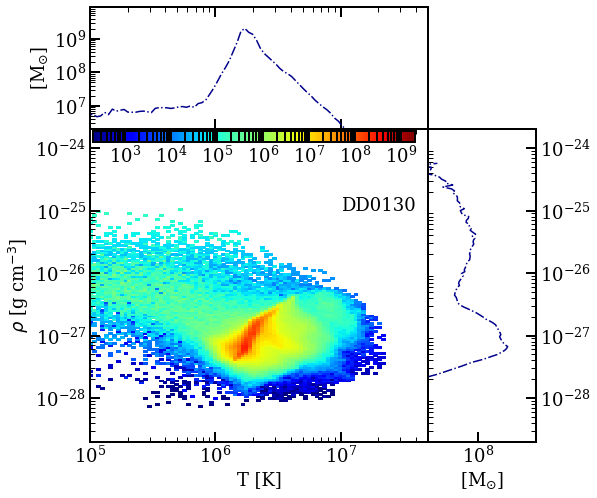

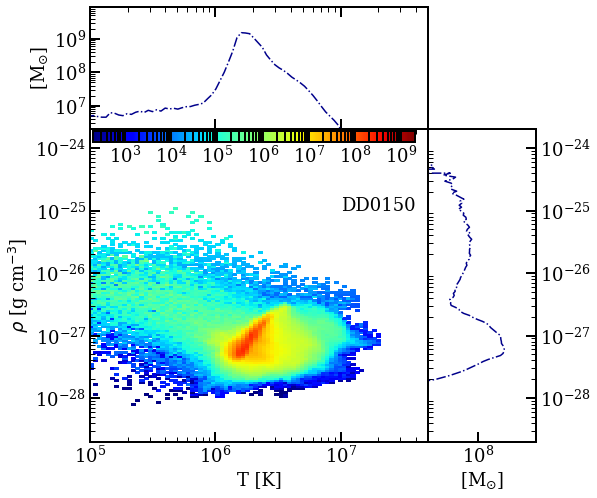

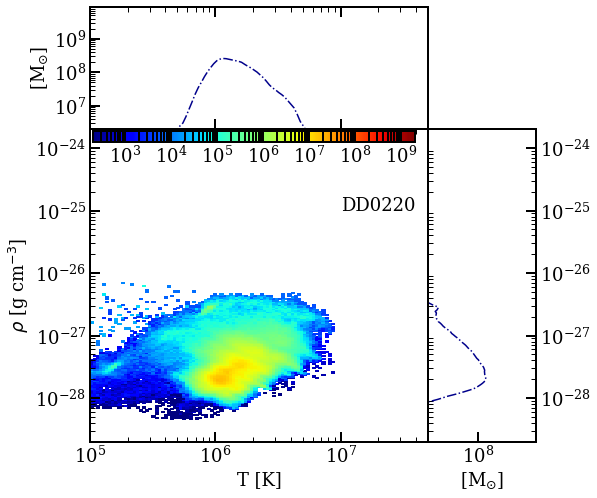

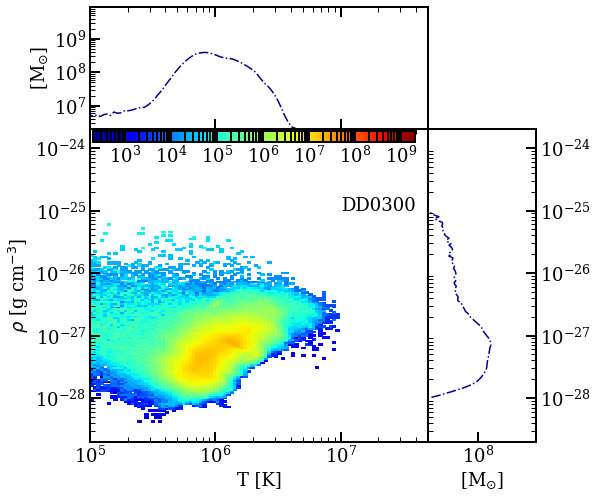

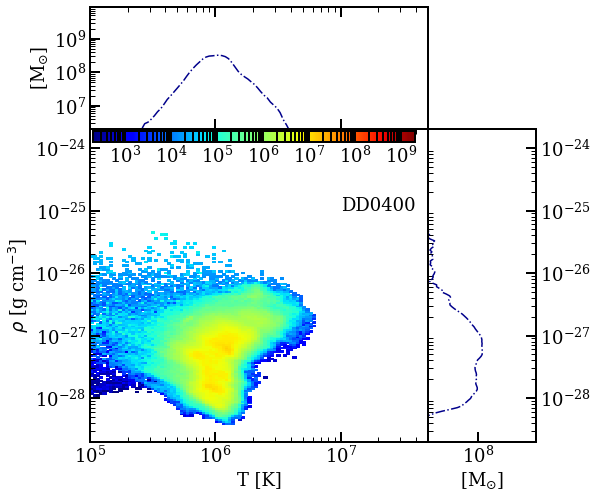

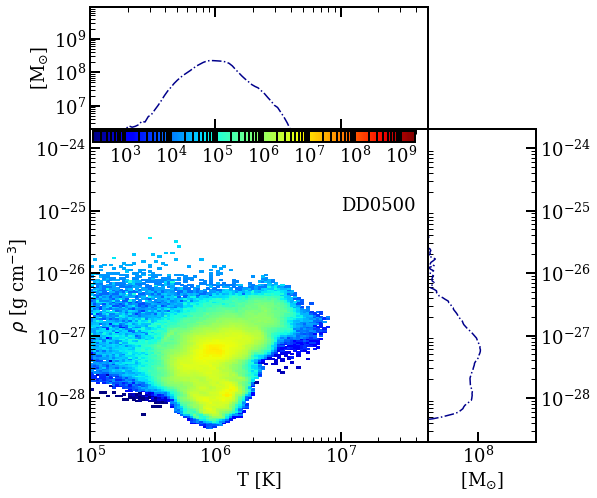

In [36]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
Msun = 1.e33
majorLocator = MultipleLocator(2)
majorFormatter = FormatStrFormatter('%d')




for i in range(run):
    f, ax = plt.subplots(1, 1, gridspec_kw = {'hspace':0.0,},figsize=(8,8))
    divider = make_axes_locatable(ax)

    plot = ax.pcolormesh(y[i],x[i],z[i,:,:]/Msun, norm=colors.LogNorm(vmin=2e35/Msun, vmax=2.e42/Msun),
                   cmap='jet')


    axHistx = divider.append_axes("top", size=1.7, pad=0, sharex=ax)
    axHisty = divider.append_axes("right", size=1.5, pad=0, sharey=ax)
    axHistx.set_ylim(2.e39/Msun, 9.e42/Msun)
    axHisty.set_xlim(2.e39/Msun, 9.e42/Msun)
    
    axHistx.plot(temp[i,:],cellmT[i,:]/Msun, '-.', color = 'darkblue')
    axHisty.plot(cellmD[i,:]/Msun,dens[i,:], '-.', color = 'darkblue')
    
    axHistx.set_yscale('log')
    axHisty.set_xscale('log')
    
    
    axHistx.tick_params(axis='y', which='minor', left=True)
    
    axHisty.tick_params(axis='y', which='minor', left=False, right=True)
    
    ax.tick_params(axis='x', labelbottom=False)
    

    
    axHistx.tick_params(axis='x', which='minor', bottom=False, top=True)    
    axHistx.tick_params(axis='x', top =True, bottom=False, labelbottom=False, labeltop = True) 
   
    
    axHistx.tick_params(axis='x', top =True, bottom=True, labelbottom=False, labeltop = False)
    ax.tick_params(axis='x', which='both', top=True)

        
    axHisty.tick_params(axis='y', left=False, right=True, labelleft=False, labelright = True)
    axHisty.tick_params(axis='y', which = 'minor', left=True)
    
    axHistx.set_ylabel("[M$_{\odot}$]")
    
    
    axHisty.set_xlabel("[M$_{\odot}$]")
    ax.tick_params(axis='x', labelbottom=True)


    ax.set_ylabel(r'$\rho$ [g cm$^{-3}$]')
    ax.set_xlabel(r'T [K]')
    axHisty.tick_params(axis='x', which='minor', bottom=True, top=True)
    ax.tick_params(axis='x', labelbottom=True)
    
    
    cax = f.add_axes([0.13, 0.645, 0.56, 0.02])
    f.colorbar(plot, cax=cax, orientation='horizontal')
    
    text = filename[i].split('/')[0] 
    ax.text(1.e7, 1.e-25, text)
    plt.setp(ax,'yscale','log')
    plt.setp(ax,'xscale','log')
    plt.setp(ax, 'xlim', (1.e5, 5.e7))

    plt.setp(ax, 'ylim', (2.e-29, 2.e-24))
    plt.savefig(text + '_histo.pdf', bbox_inches= 'tight', dpi=160)
    plt.show()
#     if(os.path.exists(file_loc)):
#             outfile  = base1 + folder[j] + file.split('/')[0] + '/'
    